In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [31]:
clf.fit(X_train,y_train)


LogisticRegression()

In [32]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)


0.6759776536312849

In [35]:
accuracy_score(y_test,y_pred1)

0.6145251396648045

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


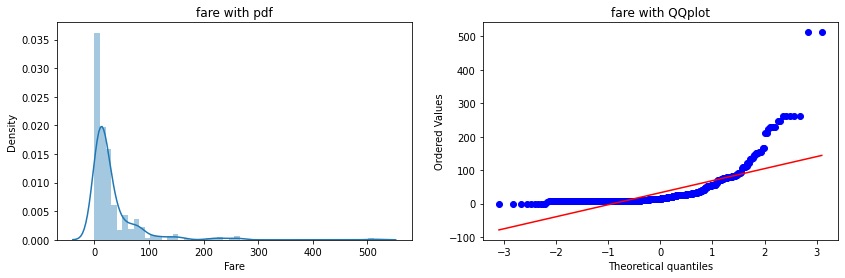

In [50]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('fare with pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist= 'norm',plot=plt)
plt.title('fare with QQplot')
plt.show()

In [57]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


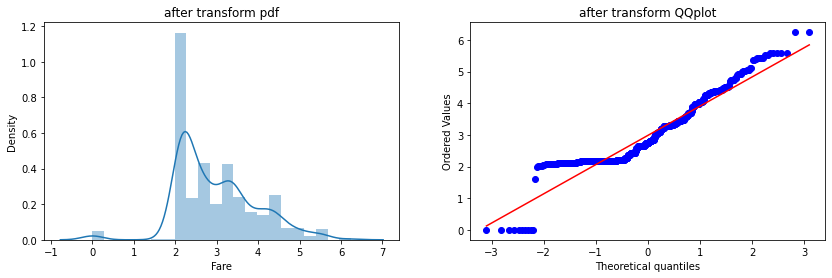

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transformed['Fare'])
plt.title("after transform pdf")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('after transform QQplot')
plt.show()


In [55]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()


In [59]:
clf3.fit(X_train_transformed,y_train)
clf4.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [60]:
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred3)

0.7318435754189944

In [62]:
accuracy_score(y_test,y_pred4)

0.6368715083798883

In [63]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

In [68]:
apply_transform(np.)

AttributeError: ignored